In [ ]:
import tensorflow as tf
import numpy as np

In [16]:
tf.compat.v1.disable_eager_execution()

In [2]:
hello = tf.constant("Hello world")

In [3]:
hello

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello world'>

In [6]:
with tf.compat.v1.Session() as sess:
  a = tf.constant([1, 4, 5, 2])
  b = tf.constant([0, 1, 2, 3])

  print(sess.run(a + b))

[1 5 7 5]


In [20]:
a = tf.compat.v1.placeholder(tf.int16)
b = tf.compat.v1.placeholder(tf.int16)

In [21]:
add = tf.compat.v1.add(a, b)

In [25]:
with tf.compat.v1.Session() as sess:
  tf.compat.v1.summary.FileWriter('logs', sess.graph)
  print(sess.run(add, feed_dict={a:4, b:5}))

9


In [26]:
! tensorboard --logdir logs

2020-09-12 17:24:30.700309: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression

In [28]:
n_samples = 42
X_train, y_train = make_regression(n_samples=n_samples, n_features=1, noise=15)
X_train = (X_train - X_train.mean()) / X_train.std()
y_train = (y_train - y_train.mean()) / y_train.std()

In [32]:
X = tf.compat.v1.placeholder('float')
y = tf.compat.v1.placeholder('float')

In [33]:
w = tf.Variable(np.random.random(), name="weight")
b = tf.Variable(np.random.random(), name="bias")

In [34]:
prediction = tf.add(tf.multiply(X, w), b)

In [38]:
learning_rate = tf.compat.v1.placeholder(tf.float32, shape=[])

cost = tf.reduce_sum(tf.pow(prediction-y, 2)) / n_samples
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [40]:
init = tf.compat.v1.global_variables_initializer()

In [54]:
epochs = 1000
sess = tf.compat.v1.Session()

sess.run(init)
lr = 0.1
for epoch in range(epochs):
  for x_batch, y_batch in zip(X_train, y_train):
    sess.run(optimizer, feed_dict={X:x_batch, y:y_batch, learning_rate:lr})

  if epoch % 100 == 0:
    lr /= 2
    e = sess.run(cost, feed_dict={X:X_train, y:y_train})
    print('Epoch #' + str(epoch) + ": cost =", e)

Epoch #0: cost = 72.66717
Epoch #100: cost = 81.12136
Epoch #200: cost = 81.14489
Epoch #300: cost = 81.15549
Epoch #400: cost = 81.15982
Epoch #500: cost = 81.162674
Epoch #600: cost = 81.16368
Epoch #700: cost = 81.16523
Epoch #800: cost = 81.16474
Epoch #900: cost = 81.16329


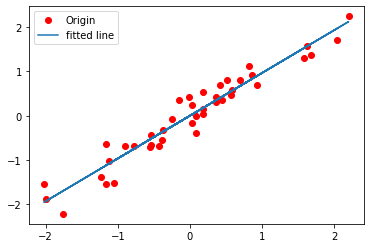

In [55]:
plt.plot(X_train, y_train, 'ro', label="Origin")
plt.plot(X_train, sess.run(w) * X_train + sess.run(b), label="fitted line")
plt.legend()
plt.show()

In [57]:
X_train[0]

array([0.4127751])

In [58]:
sess.close()